In [1]:
from deepar import *

In [2]:
mx.random.seed(0)
np.random.seed(0)

In [3]:
filepath = 'data/cr2_qflxAmon_2018/cr2_qflxAmon_2018.txt'
df_fl = pd.read_csv(filepath, parse_dates=True)
filepath = 'data/cr2_tasAmon_2018_ghcn/cr2_tasAmon_2018_ghcn.txt'
df_t = pd.read_csv(filepath, parse_dates=True)
filepath = 'data/cr2_prAmon_2018/cr2_prAmon_2018.txt'
df_p = pd.read_csv(filepath, parse_dates=True)

In [4]:
df_t = df_t.loc[:,df_t.iloc[0] == 'DGA']
df_t = df_t.add_prefix('t_')

In [5]:
df_p = df_p.loc[:,df_p.iloc[0] == 'DGA']
df_p = df_p.add_prefix('p_')

In [6]:
df = pd.concat([df_fl, df_t, df_p], axis=1)

In [7]:
df = df.replace(-9999, np.nan)
df = df.replace('-9999', np.nan)
df = df.drop([i for i in range(14)])
df = df.rename(columns={"codigo_estacion": "dates"})

In [8]:
test_station = '7321002'
columns = ['dates', '7321002', 't_7321002', 'p_7321002']
df1 = get_df(df, columns, past_years=20)
model = fit(df1, columns)
predict(model, df1, test_station, plot=False)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 186.46it/s]


,DeepAR,Seasonal naive
MASE,0.235716,0.277483
MSIS,1.739736,11.099312
NSE,0.037627,-0.144646


In [9]:
test_station = '7321002'
columns = ['dates', '7321002', '7300001', '7317005', '7303000', '7306001', '7317003', '7308002', '7308001', '7320003', 't_7321002', 't_7317005', 't_7303000', 't_7306001', 't_7320003', 'p_7321002', 'p_7317005', 'p_7303000', 'p_7306001', 'p_7320003']
df2 = get_df(df, columns, past_years=20)
model = fit(df2, columns)
predict(model, df2, test_station, plot=False)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 170.91it/s]


,DeepAR,Seasonal naive
MASE,0.223070,0.277483
MSIS,1.604466,11.099312
NSE,0.103605,-0.144646


100%|██████████| 50/50 [00:02<00:00, 24.45it/s, epoch=10/10, avg_epoch_loss=3.17]


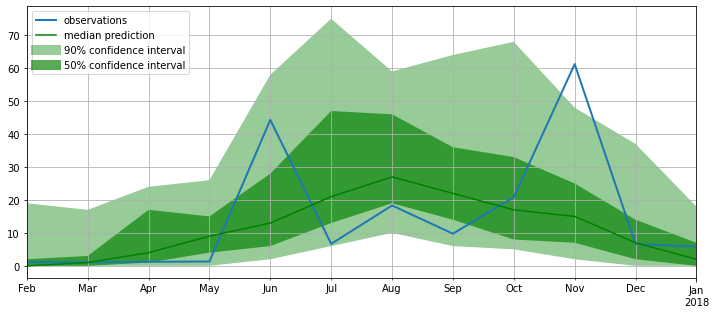

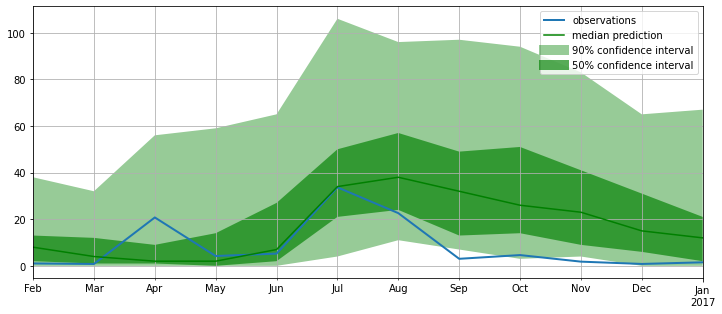

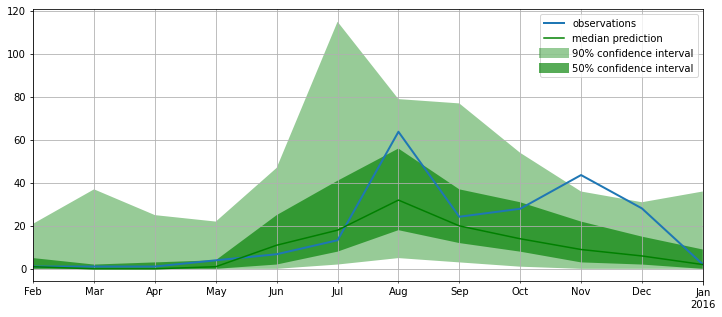

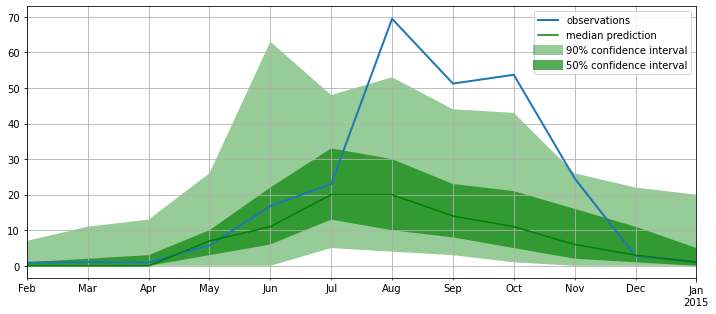

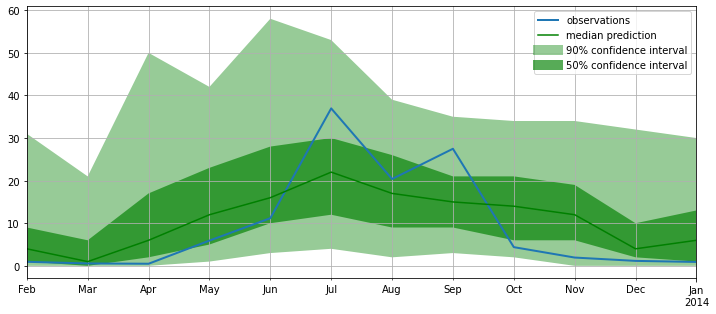

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 49.42it/s]


,DeepAR,Seasonal naive
MASE,0.223424,0.277483
MSIS,1.692530,11.099312
NSE,0.075274,-0.144646


In [11]:
test_station = '7321002'
df3 = df.iloc[- 20 * 12:]
df3 = df3.set_index('dates')
df3 = df3.dropna(thresh=100, axis=1)
columns = df3.columns.values.tolist()

model = fit(df3, columns)
predict(model, df3, test_station, plot=True)